# Feature Engineering
Author: Kim Hazed Delfino

## Imports

In [1]:
import pandas as pd
import numpy as np
# Libs for plots
import matplotlib.pyplot as plt
import seaborn as sns
# Necessary libs 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.compose import make_column_selector, make_column_transformer
# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Load the Data

In [2]:
path = r"C:\Users\kdelfino\Documents\GitHub\Feature_Engineering\bikeshare_train - bikeshare_train.csv"
# Base Dataframe
df_base = pd.read_csv(path)
# Dataframe subject for Feature Engineering
df_engineered = df_base.copy()

## Exploratory Data Analysis

In [3]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
# Check for duplicate values 
df_base.duplicated().sum()

0

- Dropping `casual` and `registered` column as they are `redundant` to our target `count` 

In [5]:
# Drop casual and registered on both dataframes
df_base.drop(columns=["casual","registered"], inplace=True)
df_engineered.drop(columns=["casual","registered"], inplace=True)

In [6]:
# Double check
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [7]:
df_engineered.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
7022,2012-04-10 22:00:00,2,0,1,1,16.40,20.455,37,32.9975,127
3027,2011-07-15 1:00:00,3,0,1,1,25.42,29.545,73,12.9980,20
7358,2012-05-05 23:00:00,2,0,0,2,22.96,26.515,83,19.0012,149
8441,2012-07-13 2:00:00,3,0,1,2,27.06,31.060,61,6.0032,17
4132,2011-10-04 5:00:00,4,0,1,1,16.40,20.455,82,8.9981,27


In [8]:
# Parse Hour of day from datetime
df_engineered["time"] = df_engineered["datetime"].apply(lambda x: x.split(" ")[1])

In [9]:
# Parse YYYY-MM-YY from datetime into respective columns
df_engineered["year"] = df_engineered["datetime"].apply(lambda x: x.split("-")[0])
df_engineered["month"] = df_engineered["datetime"].apply(lambda x: x.split("-")[1])
df_engineered["datetime"]= df_engineered["datetime"].apply(lambda x: x.split(" ")[0]) # remove time from datetime
df_engineered["day"] = df_engineered["datetime"].apply(lambda x: x.split("-")[2])

- Now we that YYYY-MM-DD-T are separated, we can now drop the `datetime` and `season` columns to prevent redundancy 

In [10]:
# Drop datetime and season
df_engineered.drop(columns=["datetime","season"], inplace=True)

In [11]:
# Double check 
df_engineered.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,time,year,month,day
0,0,0,1,9.84,14.395,81,0.0,16,0:00:00,2011,01,01
1,0,0,1,9.02,13.635,80,0.0,40,1:00:00,2011,01,01
2,0,0,1,9.02,13.635,80,0.0,32,2:00:00,2011,01,01
3,0,0,1,9.84,14.395,75,0.0,13,3:00:00,2011,01,01
4,0,0,1,9.84,14.395,75,0.0,1,4:00:00,2011,01,01


In [12]:
# Convert Celsius to Fahrenheit and rounded to whole numbers
def c_to_f(x):
    return round((x*9/5+32))

In [13]:
# Convert temp and atemp to Fahrenheit
df_engineered["temp"] = df_engineered["temp"].apply(c_to_f)
df_engineered["atemp"] = df_engineered["atemp"].apply(c_to_f)

In [14]:
# Double Check
df_engineered.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,time,year,month,day
0,0,0,1,50,58,81,0.0,16,0:00:00,2011,01,01
1,0,0,1,48,57,80,0.0,40,1:00:00,2011,01,01
2,0,0,1,48,57,80,0.0,32,2:00:00,2011,01,01
3,0,0,1,50,58,75,0.0,13,3:00:00,2011,01,01
4,0,0,1,50,58,75,0.0,1,4:00:00,2011,01,01


In [15]:
# Create new col with temp difference relative to atemp 
df_engineered["temp_variance"] = df_engineered["temp"] - df_engineered["atemp"]


In [16]:
# Double check
df_engineered.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,time,year,month,day,temp_variance
0,0,0,1,50,58,81,0.0,16,0:00:00,2011,01,01,-8
1,0,0,1,48,57,80,0.0,40,1:00:00,2011,01,01,-9
2,0,0,1,48,57,80,0.0,32,2:00:00,2011,01,01,-9
3,0,0,1,50,58,75,0.0,13,3:00:00,2011,01,01,-8
4,0,0,1,50,58,75,0.0,1,4:00:00,2011,01,01,-8


- Now that we have the `temp_variance` we can now drop the `atemp` to prevent redundancy

In [17]:
# Drop atemp
df_engineered.drop(columns="atemp",inplace=True)

In [18]:
# Double check 
df_engineered.sample(5)

,holiday,workingday,weather,temp,humidity,windspeed,count,time,year,month,day,temp_variance
8112,0,1,2,72,83,15.0013,250,9:00:00,2012,06,18,-6
4750,1,0,1,57,53,16.9979,66,0:00:00,2011,11,11,-4
3754,0,1,3,76,88,8.9981,190,9:00:00,2011,09,07,-5
1268,0,1,1,69,48,19.0012,142,16:00:00,2011,03,17,-7
10747,0,1,1,47,69,7.0015,34,5:00:00,2012,12,14,-5


### Distribution using Historgram

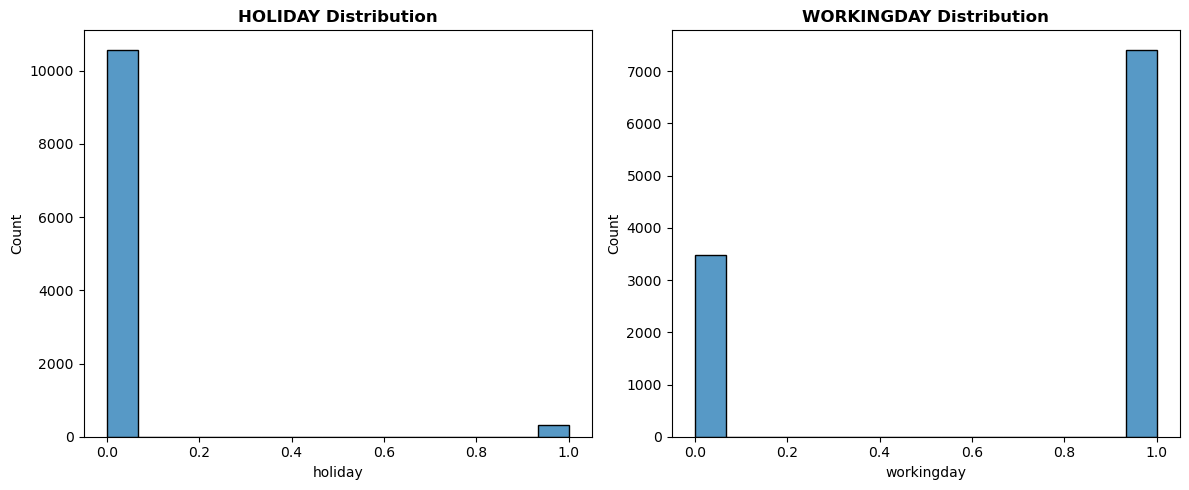

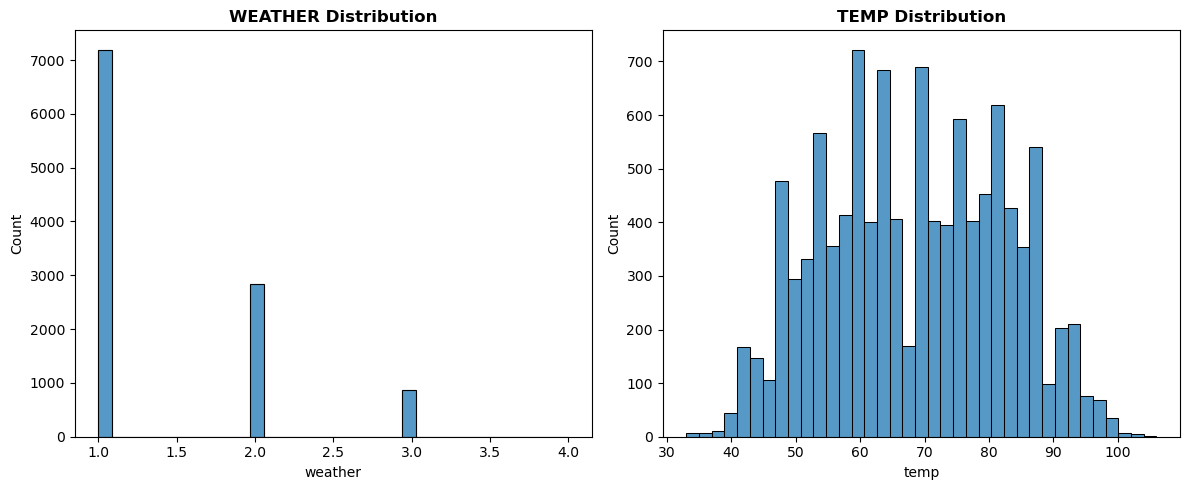

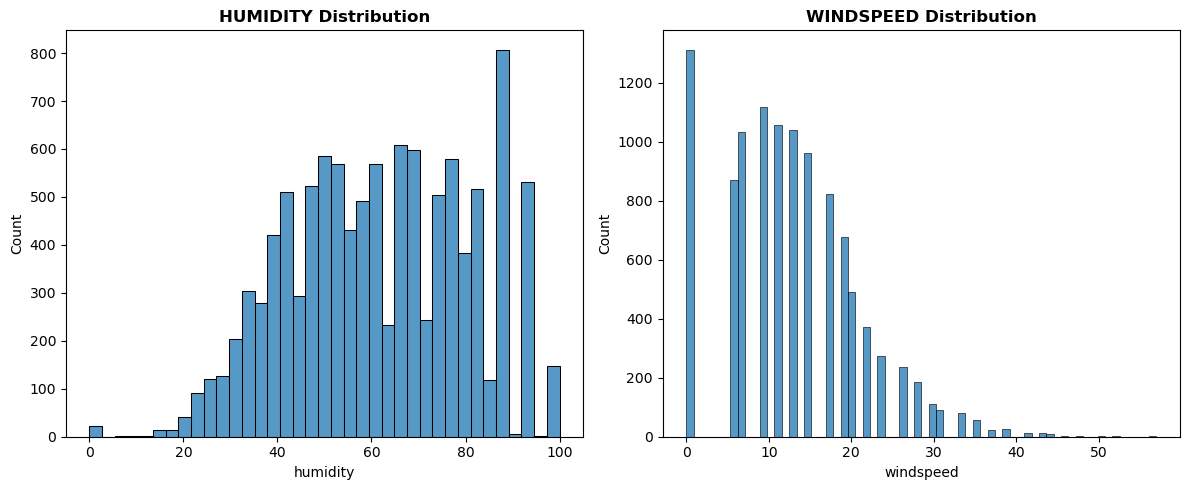

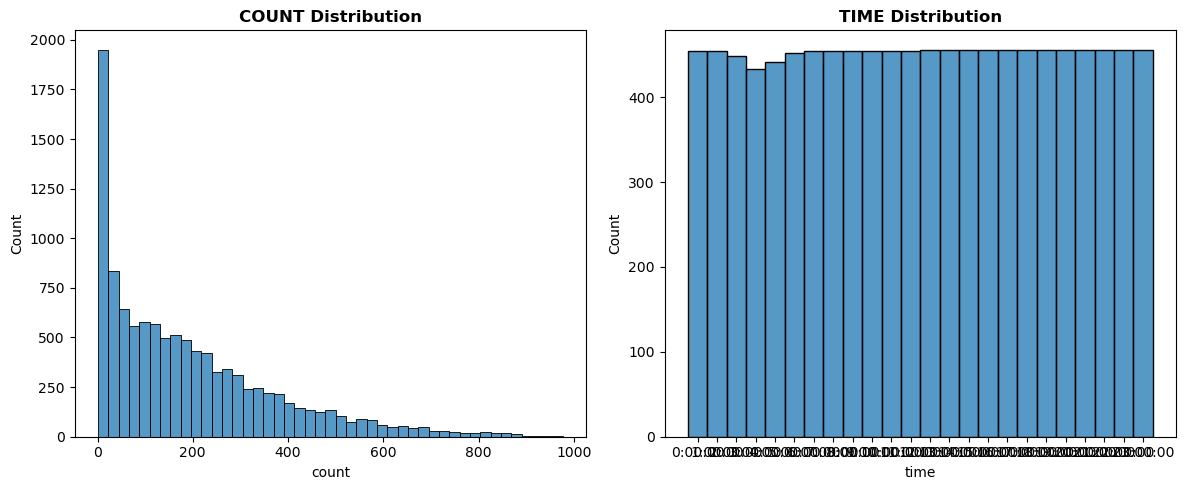

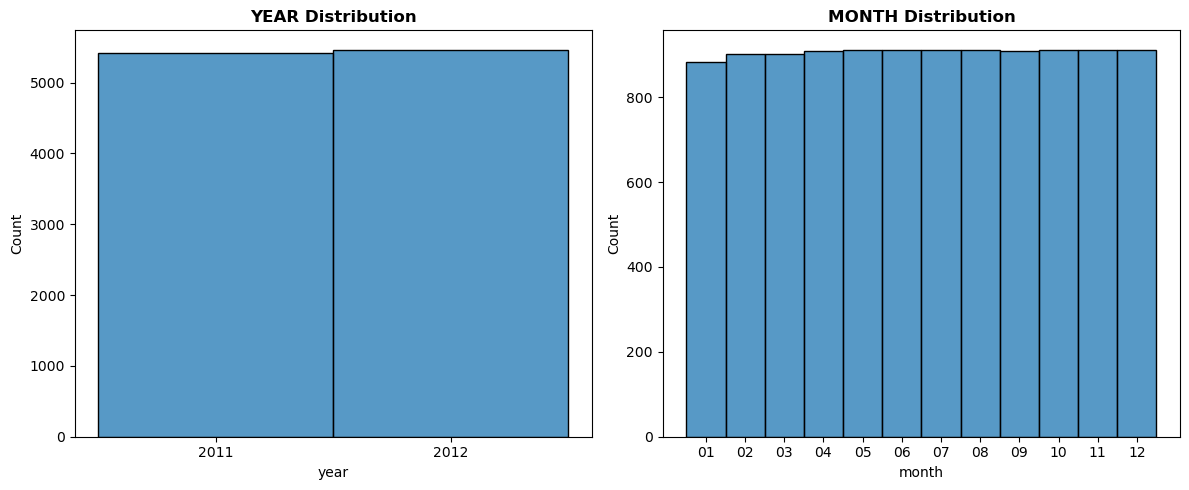

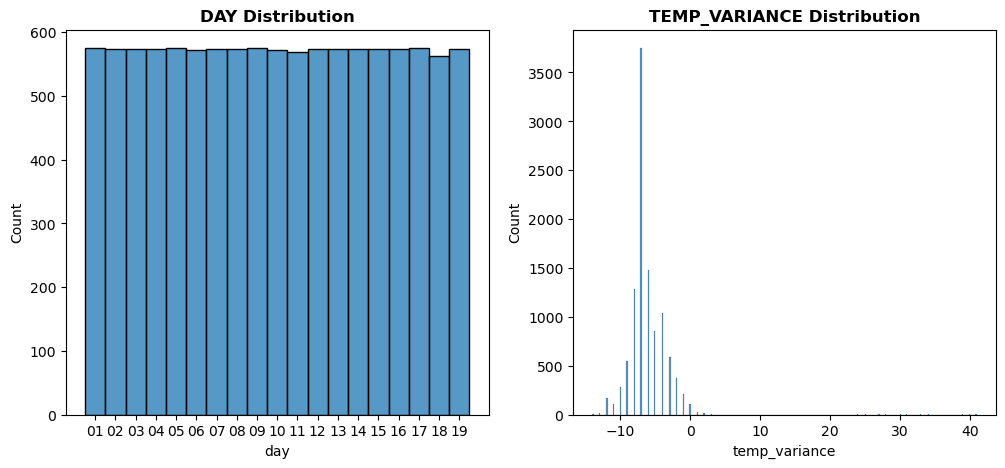

In [19]:
col_ax = 0
row_limit = 5
counter = 0
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
# Iterate to all features and display Historgram
for col in df_engineered.columns:
    # Set Historgram 
    ax=sns.histplot(data=df_engineered, x=col, ax=axes[col_ax])
    axes[col_ax].set_title(col.upper()+" Distribution", fontweight="bold")
    
    # Display every 2 cols and set new fig
    if col_ax == 1 and counter != row_limit:
        fig.tight_layout()
        fig, axes = plt.subplots(ncols=2, figsize=(12,5))
        col_ax = 0
        counter += 1
    else:
        col_ax += 1

- On Initial glance we can see that `holiday` and `temp_variance` have some `noise` or `outliers` that we need to look into

In [20]:
# Check holiday
df_engineered["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [21]:
# Filter only holidays
holiday_filtered = df_engineered[df_engineered["holiday"]==1]
holiday_filtered["month"].value_counts()

01    71
04    48
07    48
09    48
10    48
11    48
Name: month, dtype: int64

In [22]:
# Filter January to check the days
holi_month_filter =holiday_filtered[holiday_filtered["month"]=="01"]
holi_month_filter["day"].value_counts()

17    24
16    24
02    23
Name: day, dtype: int64

In [23]:
# Filter non-holiday for January to compare the days with holiday ones 
non_holiday_filtered = df_engineered[df_engineered["holiday"]==0]
non_holi_month_filter =non_holiday_filtered[non_holiday_filtered["month"]=="01"]
non_holi_month_filter["day"].value_counts()

01    48
08    48
15    48
13    48
09    48
19    47
14    47
10    47
07    47
06    47
05    47
04    47
11    46
12    46
03    46
18    36
16    24
02    23
17    23
Name: day, dtype: int64

- Here we can see that `2nd, 16th and 17th of January` are both in `holiday` and `non-holiday` data meaning this column cannot be trusted and will just create inconsistency in our dataset so we can drop this feature

In [24]:
# drop holiday
df_engineered.drop(columns="holiday",inplace= True)

In [25]:
# Double check
df_engineered.head()

,workingday,weather,temp,humidity,windspeed,count,time,year,month,day,temp_variance
0,0,1,50,81,0.0,16,0:00:00,2011,01,01,-8
1,0,1,48,80,0.0,40,1:00:00,2011,01,01,-9
2,0,1,48,80,0.0,32,2:00:00,2011,01,01,-9
3,0,1,50,75,0.0,13,3:00:00,2011,01,01,-8
4,0,1,50,75,0.0,1,4:00:00,2011,01,01,-8


In [26]:
# Check for temp_variance
df_engineered["temp_variance"].value_counts(ascending=True)

 31       1
 24       1
 34       1
 30       1
 41       2
-14       2
 40       2
 33       2
 39       3
 27       3
 28       3
 3        4
 25       5
-13      12
 2       12
 1       30
 0      109
-11     110
-12     167
-1      214
-10     286
-2      373
-9      549
-3      590
-5      853
-4     1037
-8     1286
-6     1477
-7     3751
Name: temp_variance, dtype: int64

In [27]:
total = df_engineered["temp_variance"].value_counts().sum()
# Get percent of low occurrences >= 5 
print(f"we will be removing {round(((1+1+1+1+2+2+2+2+3+3+3+4+5)/total)*100,2)}%")

we will be removing 0.28%


- Here we can see all the `temp_variance` with least amount of occurrences, Even if we drop temp_variance with >= 5 occurrences we are only dropping 0.28% of our dataset

In [28]:
# Drop noise temp_var <=2 
df_engineered = df_engineered[df_engineered["temp_variance"]<=2] 

In [29]:
# Drop the -14 temp_var
df_engineered = df_engineered[df_engineered["temp_variance"]>= -13] 
df_engineered["temp_variance"].value_counts(ascending=True)

 2       12
-13      12
 1       30
 0      109
-11     110
-12     167
-1      214
-10     286
-2      373
-9      549
-3      590
-5      853
-4     1037
-8     1286
-6     1477
-7     3751
Name: temp_variance, dtype: int64

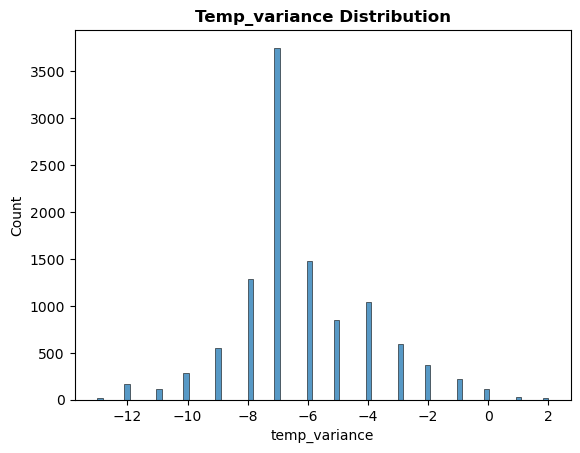

In [30]:
# Double check histogram 
ax = sns.histplot(data=df_engineered, x="temp_variance")
ax.set_title("Temp_variance Distribution", fontweight="bold");

- Here we can see better distribution after removing the outliers from ` temp_variance` column
- Now our dataset is ready for Preprocessing and Model prediction 

## Preprocessing 

### Assign Feature Matrices and Target Vector

In [31]:
# Train test split for base dataframe
X_base = df_base.drop(columns="count")
y_base = df_base["count"] 

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_base,y_base,random_state=42)

In [32]:
# Train test split for feature engineered dataframe
X_eng = df_engineered.drop(columns="count")
y_eng = df_engineered["count"] 

X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_eng,y_eng,random_state=42)

### Custom class to instantiate Model and get Metric scores

In [33]:
class ModelMaker:
    def __init__(self, model, X_train, X_test, y_train, y_test) :
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

        #Create selector
        num_selector = make_column_selector(dtype_include="number")
        col_selector = make_column_selector(dtype_include="object")

        #Create scaler object 
        scaler = StandardScaler()
        ohe = OneHotEncoder(handle_unknown="ignore")

        #Create preprocessor
        num_tuple = (scaler, num_selector)
        col_tuple = (ohe, col_selector)
        preprocessor = make_column_transformer(num_tuple,col_tuple)
        preprocessor
        
        #train the model
        model_pipe = make_pipeline(preprocessor,self.model)
        model_pipe.fit(X_train,y_train)    
        #store data into the DataFrame
        train_score = model_pipe.score(X_train, y_train)
        test_score = model_pipe.score(X_test, y_test)
        self.train_pred = model_pipe.predict(X_train)
        self.test_pred = model_pipe.predict(X_test)

        #use best param to tune hyperparameter and score metrics
    def get_metrics(self,name):
    
        metrics = [{
            "model" : name, 
            
            "test r-squared Score" : round(r2_score(self.y_test, self.test_pred),3),
            "train r-squared Score" : round(r2_score(self.y_train, self.train_pred),3), 

            "test_MAE Score": round(mean_absolute_error(self.y_test, self.test_pred),2),
            "train_MAE Score" : round(mean_absolute_error(self.y_train, self.train_pred),2),

            "test_MSE Score" : round(mean_squared_error(self.y_test, self.test_pred),2),
            "train_MSE Score" : round(mean_squared_error(self.y_train, self.train_pred),2),
            
            "train_RMSE Score" : round(mean_squared_error(self.y_train, self.train_pred, squared=False),2),
            "test_RMSE Score" : round(mean_squared_error(self.y_test, self.test_pred, squared=False),2)
    
        }]

        temp_pd = pd.DataFrame.from_dict(metrics)
        
        self.indexed_df = temp_pd.set_index("model")
        return self.indexed_df

In [34]:
# Instantiate Model with default params and base dataframe
dt_base = ModelMaker(DecisionTreeRegressor(random_state=42),X_train_b,
                     X_test_b,y_train_b,y_test_b)

In [35]:
# show metric scores
dt_base_score = dt_base.get_metrics("dt_base")
dt_base_score

,test r-squared Score,train r-squared Score,test_MAE Score,train_MAE Score,test_MSE Score,train_MSE Score,train_RMSE Score,test_RMSE Score
model,,,,,,,,
dt_base,0.035,1.0,116.82,0.0,31657.37,0.0,0.0,177.93


In [36]:
# Instantiate model with default params and Engineered dataframe 
dt_engineered = ModelMaker(DecisionTreeRegressor(random_state=42), X_train_e,
                           X_test_e, y_train_e, y_test_e)

In [37]:
# Show metric scores
dt_eng_score = dt_engineered.get_metrics("dt_engineered")
dt_eng_score

,test r-squared Score,train r-squared Score,test_MAE Score,train_MAE Score,test_MSE Score,train_MSE Score,train_RMSE Score,test_RMSE Score
model,,,,,,,,
dt_engineered,0.815,1.0,46.74,0.0,6105.62,0.0,0.0,78.14


In [38]:
# Instantiate 2nd model with default params and base df 
bg_base = ModelMaker(BaggingRegressor(random_state=42), X_train_b,
                     X_test_b, y_train_b, y_test_b)

In [39]:
# Show metric scores
bg_base_score = bg_base.get_metrics("bg_base")
bg_base_score


,test r-squared Score,train r-squared Score,test_MAE Score,train_MAE Score,test_MSE Score,train_MSE Score,train_RMSE Score,test_RMSE Score
model,,,,,,,,
bg_base,0.231,0.874,103.35,39.21,25245.48,4121.82,64.2,158.89


In [40]:
# Instantiate 2nd model with default params and engineered df
bg_engineered = ModelMaker(BaggingRegressor(random_state=42), X_train_e,
                           X_test_e, y_train_e, y_test_e)

In [41]:
# Show metric scores
bg_eng_score = bg_engineered.get_metrics("bg_engineered")

In [42]:
# Instantiate 3rd model with default params and base df
rf_base  = ModelMaker(RandomForestRegressor(random_state=42), X_train_b,
                      X_test_b, y_train_b, y_test_b)

In [43]:
# Show metric scores
rf_base_score = rf_base.get_metrics("rf_base")
rf_base_score

,test r-squared Score,train r-squared Score,test_MAE Score,train_MAE Score,test_MSE Score,train_MSE Score,train_RMSE Score,test_RMSE Score
model,,,,,,,,
rf_base,0.245,0.897,101.35,37.67,24759.98,3375.35,58.1,157.35


In [44]:
# Instantiate 3rd model with default params and engineered df
rf_eng = ModelMaker(RandomForestRegressor(random_state=42), X_train_e,
                    X_test_e, y_train_e, y_test_e)

In [45]:
# Show metric score
rf_eng_score = rf_eng.get_metrics("rf_eng")
rf_eng_score

,test r-squared Score,train r-squared Score,test_MAE Score,train_MAE Score,test_MSE Score,train_MSE Score,train_RMSE Score,test_RMSE Score
model,,,,,,,,
rf_eng,0.902,0.988,35.86,12.79,3226.82,400.09,20.0,56.81


## Overall Metric Scores 

In [46]:
# get final scores 
final_score = pd.concat([dt_base_score,dt_eng_score, bg_base_score,
                        bg_eng_score, rf_base_score, rf_eng_score])

In [47]:
# Display final score
final_score

,test r-squared Score,train r-squared Score,test_MAE Score,train_MAE Score,test_MSE Score,train_MSE Score,train_RMSE Score,test_RMSE Score
model,,,,,,,,
dt_base,0.035,1.000,116.82,0.00,31657.37,0.00,0.00,177.93
dt_engineered,0.815,1.000,46.74,0.00,6105.62,0.00,0.00,78.14
bg_base,0.231,0.874,103.35,39.21,25245.48,4121.82,64.20,158.89
bg_engineered,0.896,0.983,36.58,14.30,3417.78,559.25,23.65,58.46
rf_base,0.245,0.897,101.35,37.67,24759.98,3375.35,58.10,157.35
rf_eng,0.902,0.988,35.86,12.79,3226.82,400.09,20.00,56.81


## Conclusion

- There's no denying how bad our models performed on base dataframe, Our models had a hard time finding patterns with the base df resulting to overfitted models and horrible predictions on test sets.
- Overall,  `RandomForest` outperformed the other 2 models with default parameter setup boasting the highest R2 score(higher the better) on test set and lowest MAE score (lower the better) 